In [1]:
print("energy_prediction_with_deep_learning")

energy_prediction_with_deep_learning


# 01)Data understanding and preprocessing 

In [2]:
import pandas as pd
import numpy as np
path="../data/raw_data/energy_data_set.csv"
def data_load(path="../data/raw_data/energy_data_set.csv"):
    data=pd.read_csv(path)
    return data

In [3]:
df=data_load()
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.shape

(19735, 29)

In [5]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
df=df.sort_values("date")
df.set_index('date', inplace=True)

In [11]:
df.index=pd.to_datetime(df.index)

In [12]:
df.index.day_name()

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date', length=19735)

In [13]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
len(df)

19735

In [15]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [16]:
df["minutes"]=df.index.minute
df["minutes"]

date
2016-01-11 17:00:00     0
2016-01-11 17:10:00    10
2016-01-11 17:20:00    20
2016-01-11 17:30:00    30
2016-01-11 17:40:00    40
                       ..
2016-05-27 17:20:00    20
2016-05-27 17:30:00    30
2016-05-27 17:40:00    40
2016-05-27 17:50:00    50
2016-05-27 18:00:00     0
Name: minutes, Length: 19735, dtype: int32

# 1.1) Exploratory Data Analysis (EDA)

1.1) Import visualization libraries

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10



1.2) Time Series trends over the time (Seasonal Patterns)

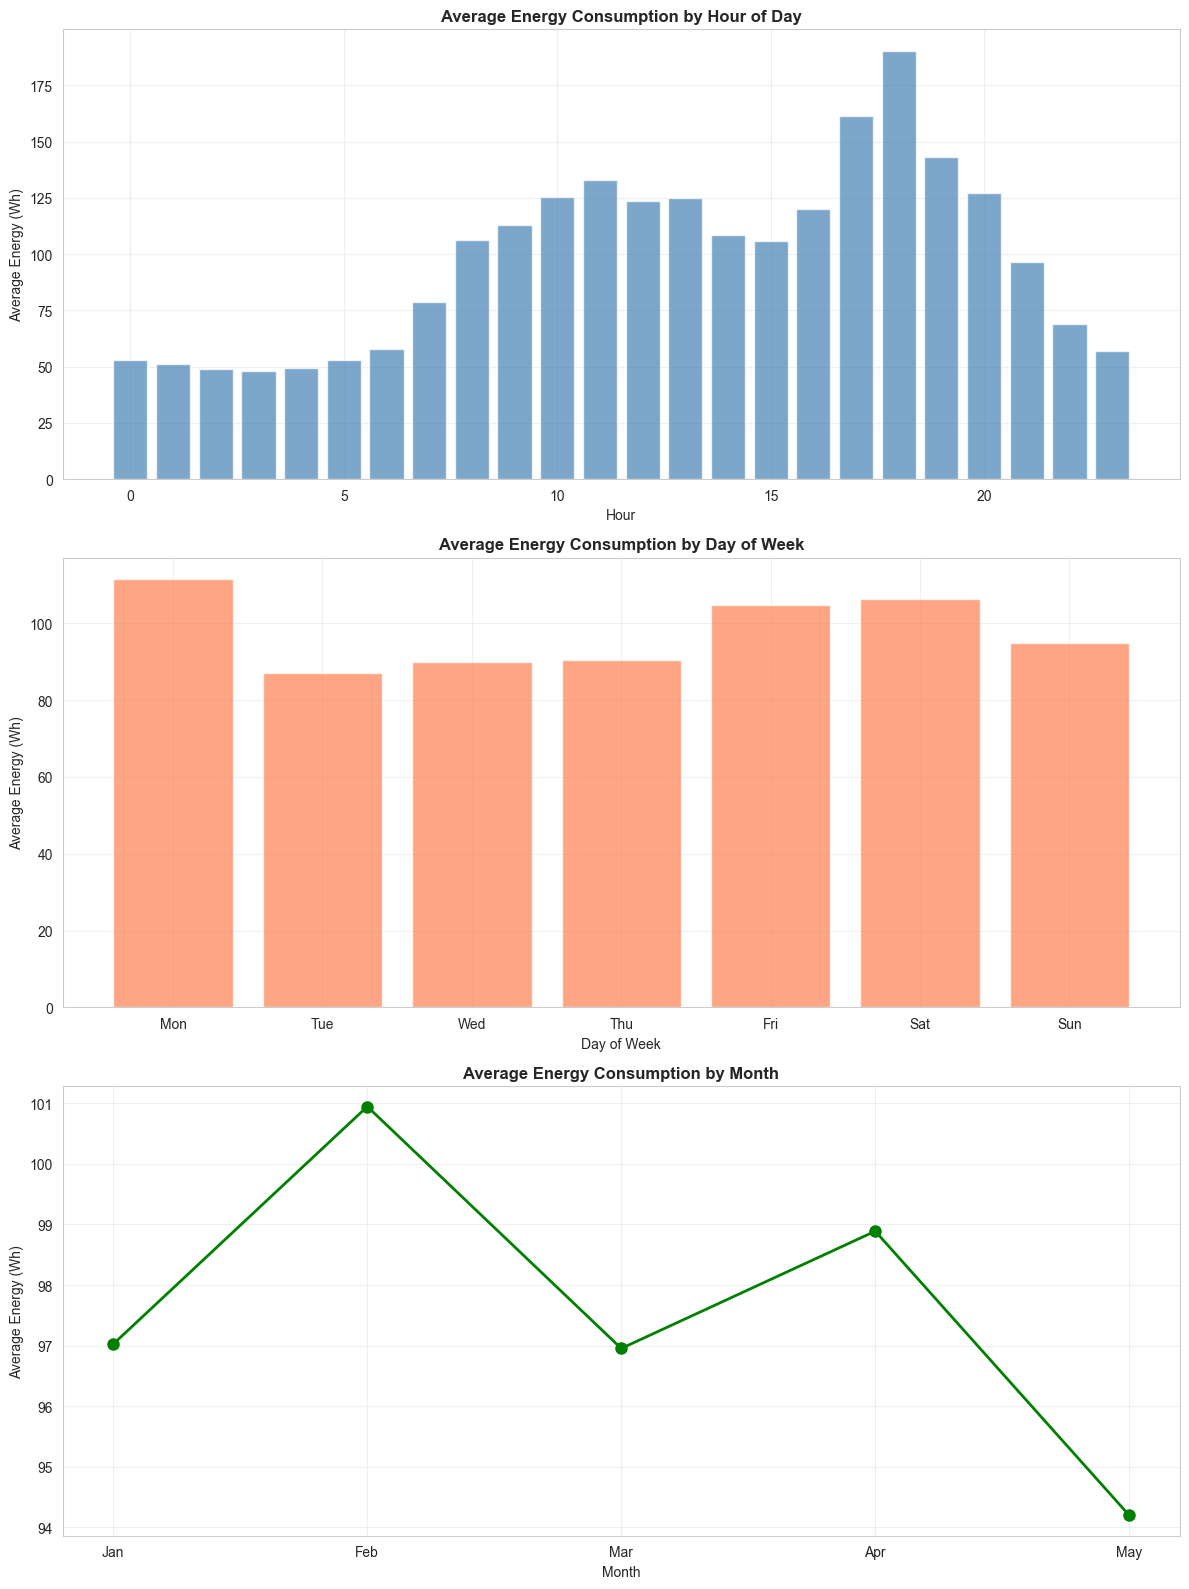

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(12, 16))

# Extract time features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# Hourly pattern
hourly_mean = df.groupby('hour')['Appliances'].mean()
axes[0].bar(hourly_mean.index, hourly_mean.values, color='steelblue', alpha=0.7)
axes[0].set_title('Average Energy Consumption by Hour of Day', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Average Energy (Wh)')
axes[0].grid(True, alpha=0.3)


# weekly patterns
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_mean = df.groupby('day_of_week')['Appliances'].mean()
axes[1].bar(daily_mean.index, daily_mean.values, color='coral', alpha=0.7)
axes[1].set_title('Average Energy Consumption by Day of Week', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average Energy (Wh)')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_names)
axes[1].grid(True, alpha=0.3)

# Monthly pattern
monthly_mean = df.groupby('month')['Appliances'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
axes[2].plot(monthly_mean.index, monthly_mean.values, marker='o', color='green', linewidth=2, markersize=8)
axes[2].set_title('Average Energy Consumption by Month', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Average Energy (Wh)')
axes[2].set_xticks(monthly_mean.index)
axes[2].set_xticklabels([month_names[m-1] for m in monthly_mean.index])
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [19]:
# Hourly pattern
hourly_mean = df.groupby('hour')['Appliances'].mean()
hourly_mean


hour
0      52.785888
1      51.326034
2      49.075426
3      48.236010
4      49.355231
5      52.737226
6      57.712895
7      78.649635
8     106.143552
9     112.785888
10    125.377129
11    133.126521
12    123.637470
13    124.744526
14    108.284672
15    105.827251
16    119.902676
17    161.352657
18    190.364520
19    143.065693
20    126.982968
21     96.496350
22     69.148418
23     56.982968
Name: Appliances, dtype: float64

In [20]:
daily_mean = df.groupby('day_of_week')['Appliances'].mean()
daily_mean

day_of_week
0    111.450684
1     87.125000
2     89.930556
3     90.434028
4    104.622144
5    106.246345
6     94.915936
Name: Appliances, dtype: float64

In [21]:
monthly_mean = df.groupby('month')['Appliances'].mean()
monthly_mean

month
1     97.026010
2    100.945881
3     96.953405
4     98.888889
5     94.199325
Name: Appliances, dtype: float64

In [22]:
month_name={1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May"}
df["Month_name"]=df["month"].map(month_name)


1.3)Outliers

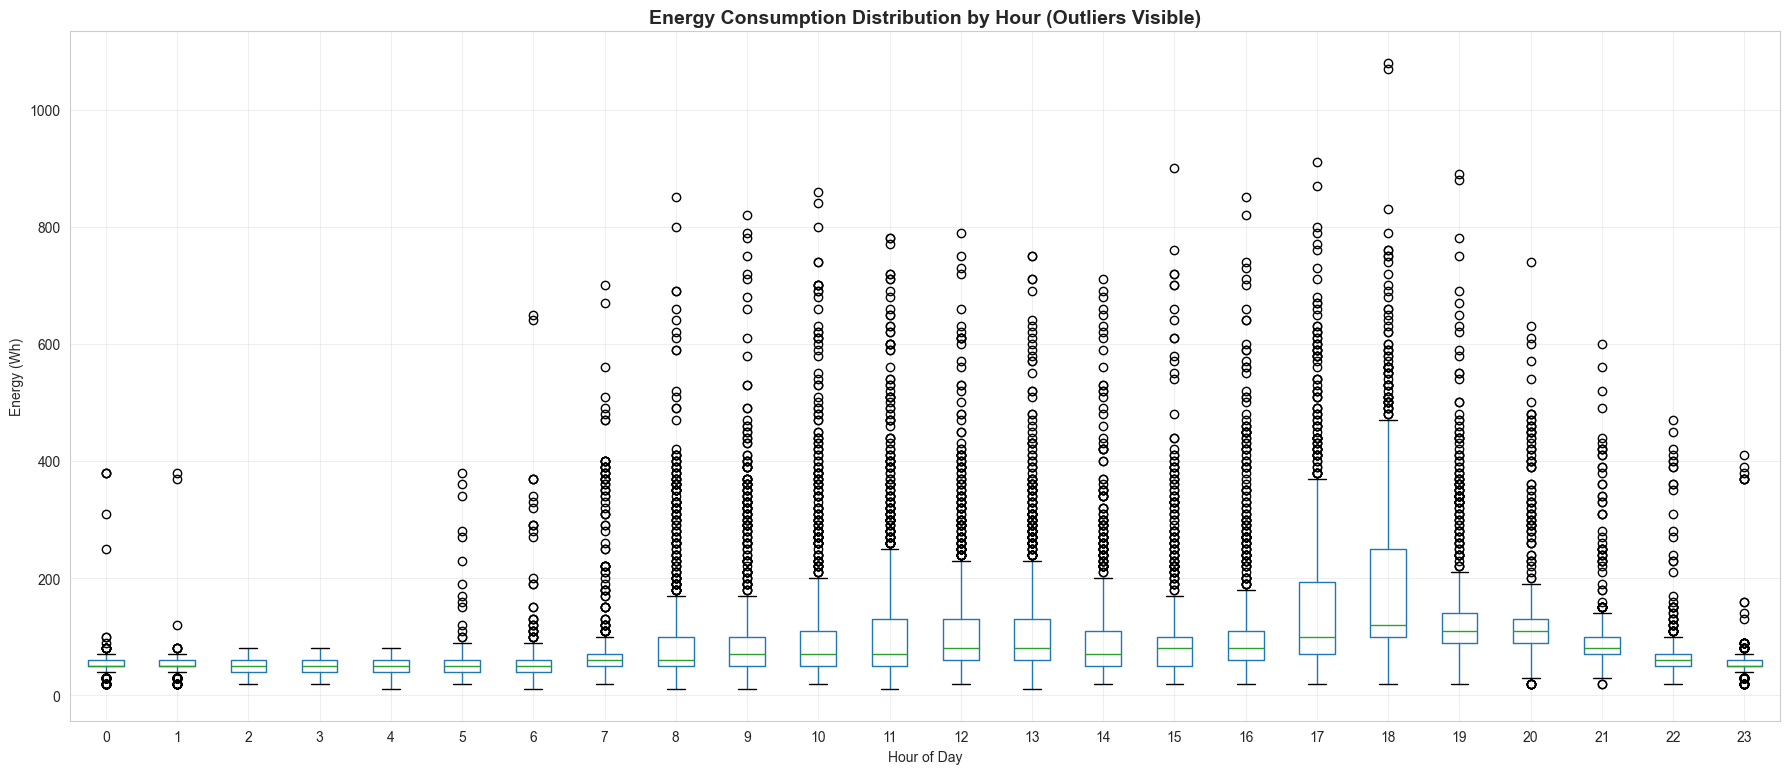

In [23]:
# HOURLY APPLIANCE OUTLIERS - Single Chart
fig, ax = plt.subplots(figsize=(18, 8))

df.boxplot(column='Appliances', by='hour', ax=ax)
ax.set_title('Energy Consumption Distribution by Hour (Outliers Visible)', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Energy (Wh)')
ax.grid(True, alpha=0.3)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


1.4)Energy consumption over the time

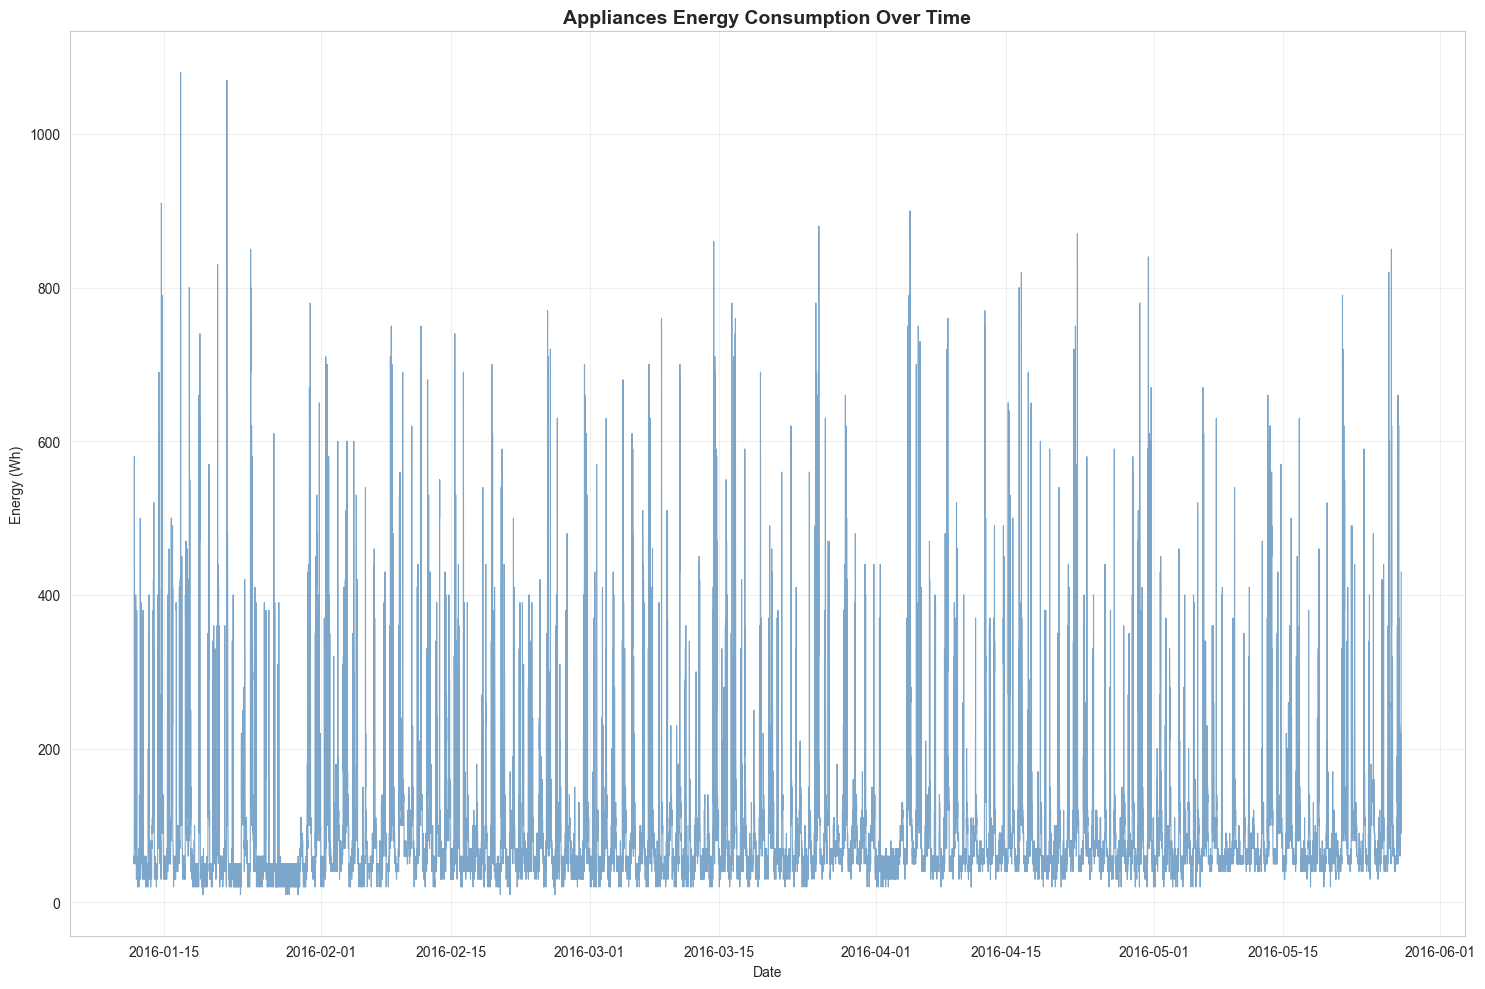

Appliances - Mean: 97.69 Wh, Std: 102.52 Wh


In [45]:
fig, axes = plt.subplots(1, figsize=(15, 10))

# Plot 1: Appliances energy consumption
axes.plot(df.index, df['Appliances'], color='steelblue', alpha=0.7, linewidth=0.8)
axes.set_title('Appliances Energy Consumption Over Time', fontsize=14, fontweight='bold')
axes.set_xlabel('Date')
axes.set_ylabel('Energy (Wh)')
axes.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

print(f"Appliances - Mean: {df['Appliances'].mean():.2f} Wh, Std: {df['Appliances'].std():.2f} Wh")


1.5)Correlations between features

In [25]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'minutes',
 'hour',
 'day_of_week',
 'month']

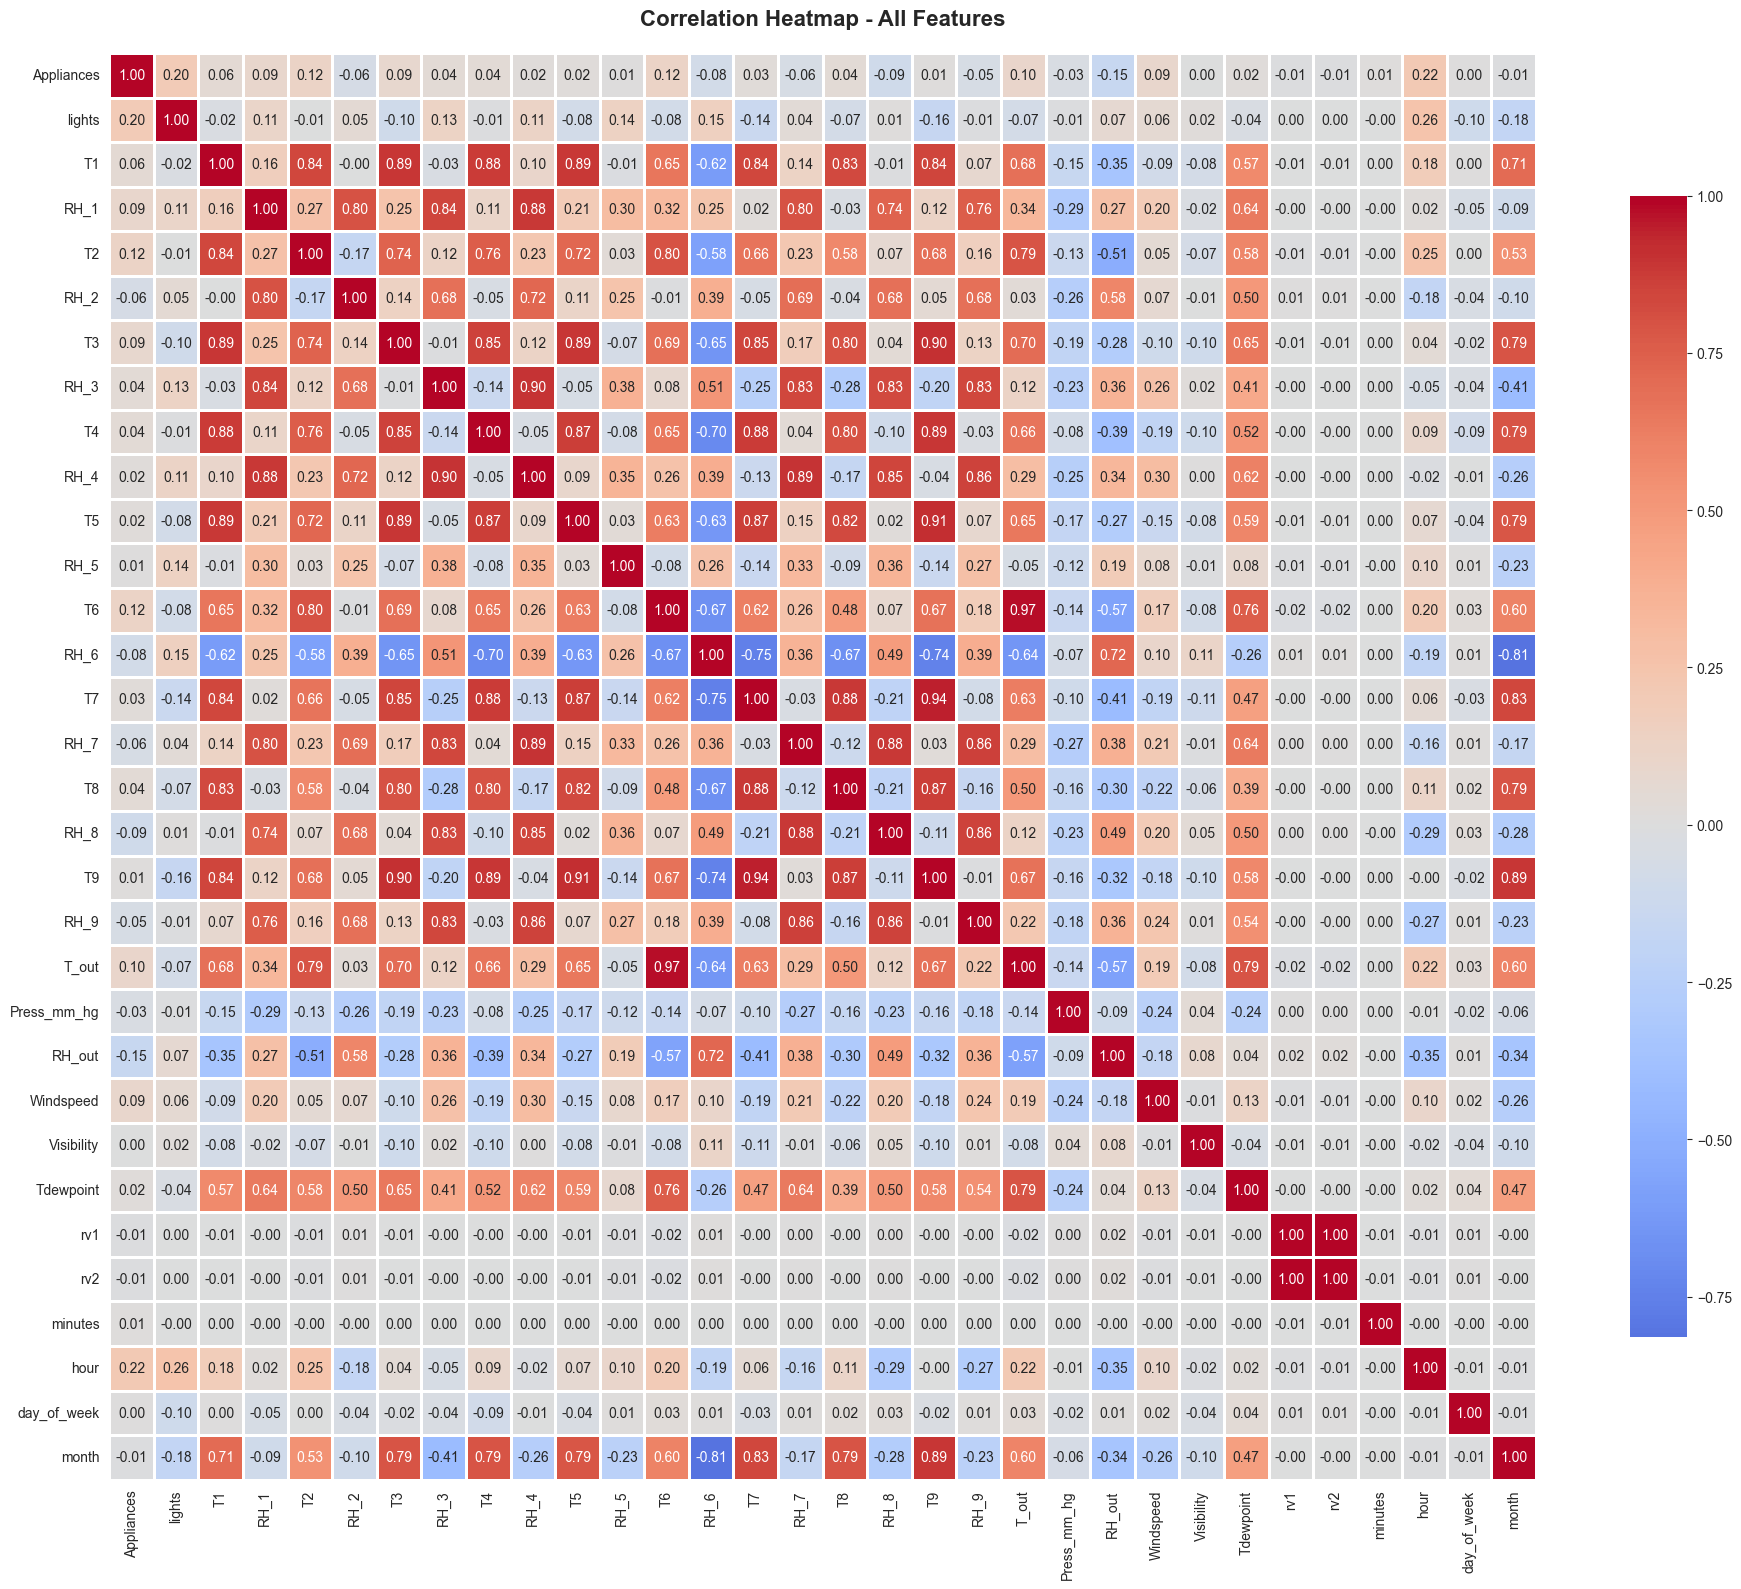


Top 10 Features Correlated with Appliances Energy:
Appliances    1.000000
hour          0.216792
lights        0.197278
T2            0.120073
T6            0.117638
T_out         0.099155
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
T1            0.055447
Name: Appliances, dtype: float64


In [26]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show top correlations with target (Appliances)
target_corr = correlation_matrix['Appliances'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Appliances Energy:")
print(target_corr.head(10))

In [27]:
feature_col=[col for col in numeric_cols if col!='Appliances']
corr_features=df[feature_col].corr()

# pairs with |correlation| > 0.9
high_corr_pairs = []
for i in range(len(corr_features.columns)):
    for j in range(i+1, len(corr_features.columns)):
        if abs(corr_features.iloc[i, j]) > 0.9:
            high_corr_pairs.append({
                'Feature_1': corr_features.columns[i],
                'Feature_2': corr_features.columns[j],
                'Correlation': corr_features.iloc[i, j]
            })

print("High Multicollinearity Detected:")
for pair in high_corr_pairs:
    print(f"{pair['Feature_1']} ↔ {pair['Feature_2']}: {pair['Correlation']:.3f}")

High Multicollinearity Detected:
T3 ↔ T9: 0.901
T5 ↔ T9: 0.911
T6 ↔ T_out: 0.975
T7 ↔ T9: 0.945
rv1 ↔ rv2: 1.000


In [28]:
high_corr_pairs

[{'Feature_1': 'T3',
  'Feature_2': 'T9',
  'Correlation': np.float64(0.9013235850825604)},
 {'Feature_1': 'T5',
  'Feature_2': 'T9',
  'Correlation': np.float64(0.9110551178067855)},
 {'Feature_1': 'T6',
  'Feature_2': 'T_out',
  'Correlation': np.float64(0.9747866900664598)},
 {'Feature_1': 'T7',
  'Feature_2': 'T9',
  'Correlation': np.float64(0.9447764235687458)},
 {'Feature_1': 'rv1', 'Feature_2': 'rv2', 'Correlation': np.float64(1.0)}]

In [29]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'minutes', 'hour', 'day_of_week', 'month',
       'Month_name'],
      dtype='object')

## 02) Data Preparation for Time Series Analysis


2.1) Handle missing and duplicated values

In [30]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
minutes        0
hour           0
day_of_week    0
month          0
Month_name     0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

2.2)Outlier Detection and Treatment: 

2.2.1) Outliers detection

In [32]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum() #sum of outliers in each key feature
    return outliers, lower_bound, upper_bound

# Analyze outliers for key features
key_features_outlier = ['Appliances', 'lights', 'T1', 'RH_1', 'T_out', 'RH_out', 'Press_mm_hg', 'Windspeed']

outlier_summary = []
for feature in key_features_outlier:
    iqr_outliers, lower, upper = detect_outliers_iqr(df[feature])
    
    outlier_summary.append({
        'Feature': feature,
        'IQR_Outliers': iqr_outliers,
        'IQR_Lower': f'{lower:.2f}',
        'IQR_Upper': f'{upper:.2f}'
    })

outlier_df = pd.DataFrame(outlier_summary)
print("OUTLIER DETECTION SUMMARY (IQR Method)")
print(outlier_df.to_string(index=False))
print("\n Interpretation:")
print("   - IQR Method: Values beyond 1.5 × IQR from Q1/Q3")
print("   - Lower Bound = Q1 - 1.5 × IQR")
print("   - Upper Bound = Q3 + 1.5 × IQR")
print("   - Robust to skewed distributions (ideal for energy data)")

OUTLIER DETECTION SUMMARY (IQR Method)
    Feature  IQR_Outliers IQR_Lower IQR_Upper
 Appliances          2138    -25.00    175.00
     lights          4483      0.00      0.00
         T1           515     18.00     25.36
       RH_1           146     28.73     51.67
      T_out           436     -6.45     20.52
     RH_out           239     38.33    123.67
Press_mm_hg           219    735.93    775.93
  Windspeed           214     -3.25     10.75

 Interpretation:
   - IQR Method: Values beyond 1.5 × IQR from Q1/Q3
   - Lower Bound = Q1 - 1.5 × IQR
   - Upper Bound = Q3 + 1.5 × IQR
   - Robust to skewed distributions (ideal for energy data)


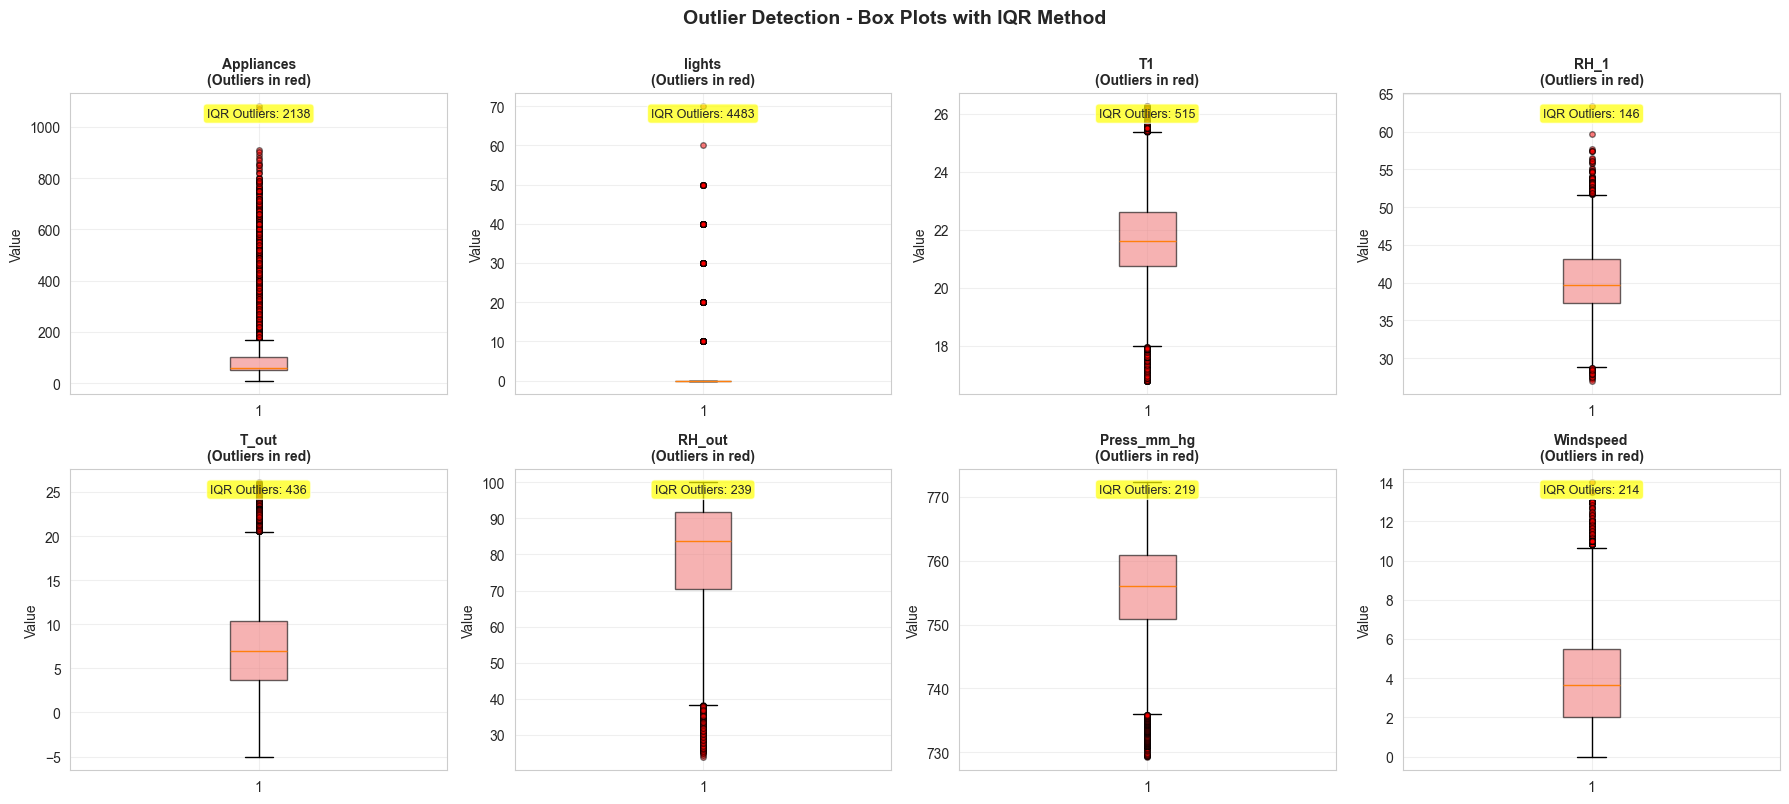

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for idx, feature in enumerate(key_features_outlier):
    axes[idx].boxplot(df[feature], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightcoral', alpha=0.6),
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    axes[idx].set_title(f'{feature}\n(Outliers in red)', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)
    
    # Add outlier count
    outlier_count = outlier_df[outlier_df['Feature'] == feature]['IQR_Outliers'].values[0]
    axes[idx].text(0.5, 0.95, f'IQR Outliers: {outlier_count}', 
                   transform=axes[idx].transAxes, fontsize=9, 
                   ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.suptitle('Outlier Detection - Box Plots with IQR Method', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [34]:
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count how many will be capped
    original_outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    
    # Cap values
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    
    return data, original_outliers

# Create cleaned dataset
df_cleaned = df.copy()

# Apply outlier treatment to sensor features ONLY
sensor_features = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
                   'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']


total_capped = 0
for feature in sensor_features:
    if feature in df_cleaned.columns:
        df_cleaned, outliers_capped = cap_outliers_iqr(df_cleaned, feature)
        total_capped += outliers_capped
        print(f"{feature:10s}: {outliers_capped:5d} outliers capped")


print(f"Total outliers capped: {total_capped:,}")
print(f"Features treated: {len([f for f in sensor_features if f in df_cleaned.columns])}")
print(f"Target variable (Appliances): {outlier_df[outlier_df['Feature']=='Appliances']['IQR_Outliers'].values[0]} outliers PRESERVED")
print(f"Weather features: Outliers PRESERVED (valid extreme conditions)")
print(f"\n Final dataset shape: {df_cleaned.shape}")


T1        :   515 outliers capped
RH_1      :   146 outliers capped
T2        :   546 outliers capped
RH_2      :   235 outliers capped
T3        :   217 outliers capped
RH_3      :    15 outliers capped
T4        :   186 outliers capped
RH_4      :     0 outliers capped
T5        :   179 outliers capped
RH_5      :  1330 outliers capped
T6        :   515 outliers capped
RH_6      :     0 outliers capped
T7        :     2 outliers capped
RH_7      :    42 outliers capped
T8        :    71 outliers capped
RH_8      :    17 outliers capped
T9        :     0 outliers capped
RH_9      :    21 outliers capped
Total outliers capped: 4,037
Features treated: 18
Target variable (Appliances): 2138 outliers PRESERVED
Weather features: Outliers PRESERVED (valid extreme conditions)

 Final dataset shape: (19735, 33)


2.2.3) Verify Treatment Impact (Before vs. After)

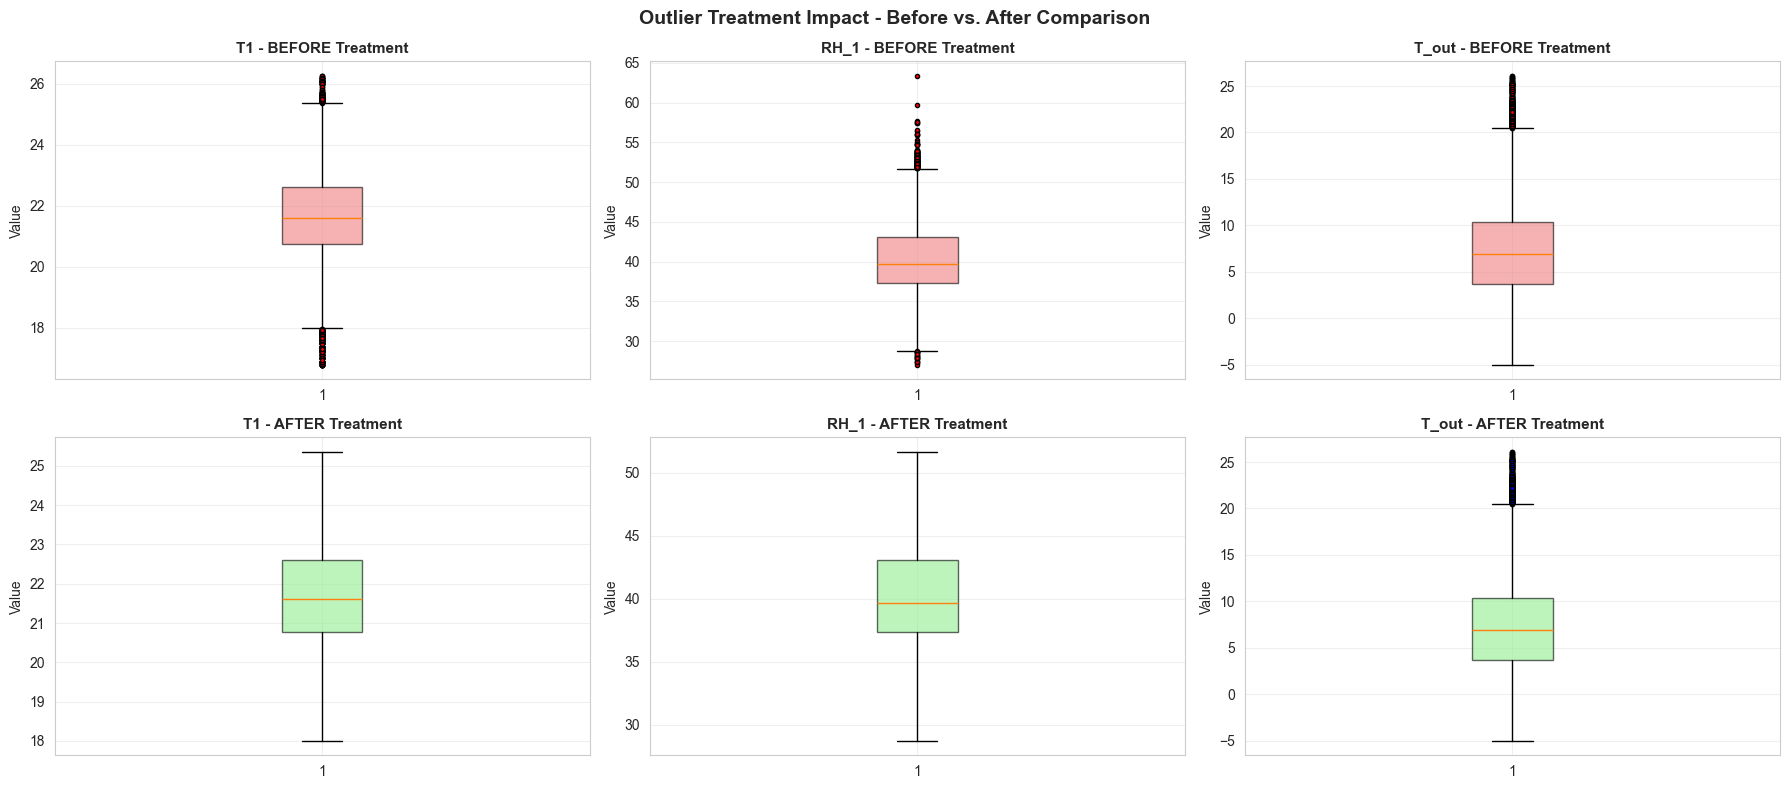

Comparison shows:
   • Indoor sensors (T1, RH_1): Extreme outliers capped to IQR boundaries
   • Weather feature (T_out): Outliers preserved (valid extreme weather)


In [35]:
# Compare before and after for sample sensor features
sample_sensors = ['T1', 'RH_1', 'T_out']

fig, axes = plt.subplots(2, 3, figsize=(18, 8))

for idx, feature in enumerate(sample_sensors):
    # Before (original data)
    axes[0, idx].boxplot(df[feature], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.6),
                         flierprops=dict(marker='o', markerfacecolor='red', markersize=3))
    axes[0, idx].set_title(f'{feature} - BEFORE Treatment', fontsize=11, fontweight='bold')
    axes[0, idx].set_ylabel('Value')
    axes[0, idx].grid(True, alpha=0.3)
    
    # After (cleaned data)
    axes[1, idx].boxplot(df_cleaned[feature], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightgreen', alpha=0.6),
                         flierprops=dict(marker='o', markerfacecolor='blue', markersize=3))
    axes[1, idx].set_title(f'{feature} - AFTER Treatment', fontsize=11, fontweight='bold')
    axes[1, idx].set_ylabel('Value')
    axes[1, idx].grid(True, alpha=0.3)

plt.suptitle('Outlier Treatment Impact - Before vs. After Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Comparison shows:")
print("   • Indoor sensors (T1, RH_1): Extreme outliers capped to IQR boundaries")
print("   • Weather feature (T_out): Outliers preserved (valid extreme weather)")

2.3.1)Feature Importance from Correlation Analysis

Based on our correlation heatmap analysis, let's identify which features have the strongest relationship with energy consumption:

In [47]:
# Get correlation with target variable
target_correlations = correlation_matrix['Appliances'].drop('Appliances').sort_values(ascending=False)



print("\nSTRONGEST POSITIVE CORRELATIONS (increase together):")
top_positive = target_correlations[target_correlations > 0].head(10)
for feature, corr in top_positive.items():
    print(f"   {feature:20s}: {corr:+.4f}")

print("\nSTRONGEST NEGATIVE CORRELATIONS (inverse relationship):")
top_negative = target_correlations[target_correlations < 0].tail(10)
for feature, corr in top_negative.items():
    print(f"   {feature:20s}: {corr:+.4f}")

print("\n INTERPRETATION:")
print("   • Positive correlation: When feature increases, energy consumption increases")
print("   • Negative correlation: When feature increases, energy consumption decreases")
print("   • |correlation| > 0.5: Strong relationship")
print("   • |correlation| > 0.3: Moderate relationship")
print("   • |correlation| < 0.3: Weak relationship")



STRONGEST POSITIVE CORRELATIONS (increase together):
   hour                : +0.2168
   lights              : +0.1973
   T2                  : +0.1201
   T6                  : +0.1176
   T_out               : +0.0992
   Windspeed           : +0.0871
   RH_1                : +0.0860
   T3                  : +0.0851
   T1                  : +0.0554
   T4                  : +0.0403

STRONGEST NEGATIVE CORRELATIONS (inverse relationship):
   rv2                 : -0.0111
   rv1                 : -0.0111
   month               : -0.0116
   Press_mm_hg         : -0.0349
   RH_9                : -0.0515
   RH_7                : -0.0556
   RH_2                : -0.0605
   RH_6                : -0.0832
   RH_8                : -0.0940
   RH_out              : -0.1523

 INTERPRETATION:
   • Positive correlation: When feature increases, energy consumption increases
   • Negative correlation: When feature increases, energy consumption decreases
   • |correlation| > 0.5: Strong relationship
   • 

2.3.2)Statistical Summary of Key Features

In [46]:
# Select most important features based on correlation analysis
important_features = ['Appliances', 'lights', 'T1', 'T2', 'RH_1', 'T_out', 'RH_out', 
                      'Windspeed', 'Press_mm_hg', 'Visibility']

# Get statistics after cleaning
stats_summary = df_cleaned[important_features].describe().T

# Add correlation with target
stats_summary['Correlation_with_Target'] = [
    correlation_matrix.loc[feat, 'Appliances'] if feat != 'Appliances' else 1.0 
    for feat in important_features
]

# Reorder columns for better readability
stats_summary = stats_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Correlation_with_Target']]


print("STATISTICAL SUMMARY OF KEY FEATURES (After Cleaning)")

print(stats_summary.round(2))
print("\nKey Observations:")
print("   • All features have 19,737 observations")
print("   • Std shows variability in each feature")
print("   • Min/Max show range after outlier treatment")
print("   • Correlation shows relationship strength with target variable")


STATISTICAL SUMMARY OF KEY FEATURES (After Cleaning)
               count    mean     std     min     25%     50%     75%      max  \
Appliances   19735.0   97.69  102.52   10.00   50.00   60.00  100.00  1080.00   
lights       19735.0    3.80    7.94    0.00    0.00    0.00    0.00    70.00   
T1           19735.0   21.69    1.58   18.00   20.76   21.60   22.60    25.36   
T2           19735.0   20.31    2.09   16.10   18.79   20.00   21.50    25.56   
RH_1         19735.0   40.25    3.94   28.73   37.33   39.66   43.07    51.67   
T_out        19735.0    7.41    5.32   -5.00    3.67    6.92   10.41    26.10   
RH_out       19735.0   79.75   14.90   24.00   70.33   83.67   91.67   100.00   
Windspeed    19735.0    4.04    2.45    0.00    2.00    3.67    5.50    14.00   
Press_mm_hg  19735.0  755.52    7.40  729.30  750.93  756.10  760.93   772.30   
Visibility   19735.0   38.33   11.79    1.00   29.00   40.00   40.00    66.00   

             Correlation_with_Target  
Appliances      

In [48]:
# Start with cleaned dataset (before scaling)
df_engineered = df_cleaned.copy()

# Weekend indicator (Saturday=5, Sunday=6)
df_engineered['is_weekend'] = (df_engineered['day_of_week'] >= 5).astype(int)

# Season (based on month)
def get_season(month):
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring


df_engineered['season'] = df_engineered['month'].apply(get_season)

# Time of day categories
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 0  # Night
    elif 6 <= hour < 12:
        return 1  # Morning
    elif 12 <= hour < 18:
        return 2  # Afternoon
    else:  # 18 <= hour < 24
        return 3  # Evening

df_engineered['time_of_day'] = df_engineered['hour'].apply(get_time_of_day)

# Peak hour indicator (based on EDA - hours 17-22 had highest consumption)
df_engineered['is_peak_hour'] = ((df_engineered['hour'] >= 17) & (df_engineered['hour'] <= 22)).astype(int)


print("\nTime-Based Features Created:")
print(f"   • is_weekend: {df_engineered['is_weekend'].sum():,} weekend observations")
print(f"   • season: {df_engineered['season'].nunique()} seasons")
print(f"   • time_of_day: {df_engineered['time_of_day'].nunique()} time periods")
print(f"   • is_peak_hour: {df_engineered['is_peak_hour'].sum():,} peak hour observations")


print(f"\nCurrent dataset shape: {df_engineered.shape}")
print(f"   Added {df_engineered.shape[1] - df_cleaned.shape[1]} new time-based features")


Time-Based Features Created:
   • is_weekend: 5,472 weekend observations
   • season: 2 seasons
   • time_of_day: 4 time periods
   • is_peak_hour: 4,939 peak hour observations

Current dataset shape: (19735, 37)
   Added 4 new time-based features


### Visualize Time-Based Features

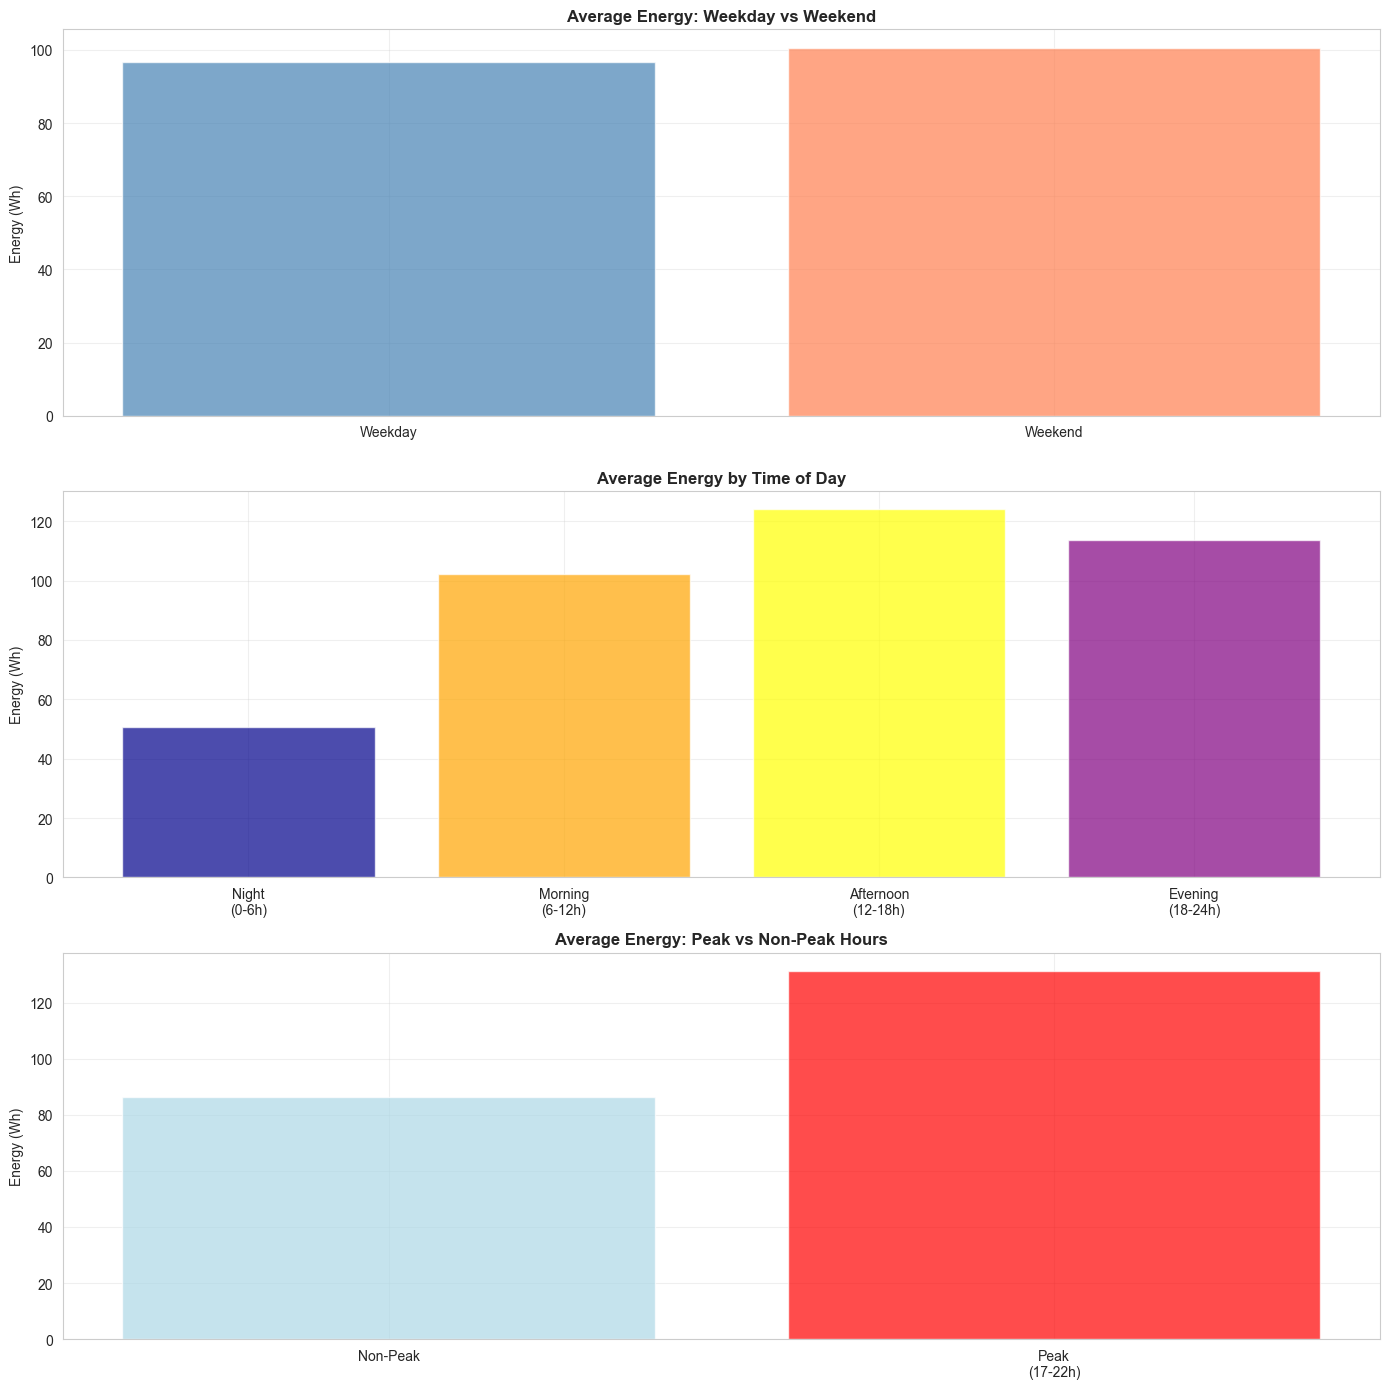

   • Weekend avg: 100.58 Wh vs Weekday: 96.59 Wh
   • Peak hours avg: 131.28 Wh vs Non-peak: 86.48 Wh
   • Evening (18-24h) has highest consumption: 113.86 Wh


In [49]:
# Visualize impact of time-based features
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

# Weekend vs Weekday
weekend_mean = df_engineered.groupby('is_weekend')['Appliances'].mean()
axes[0].bar(['Weekday', 'Weekend'], weekend_mean.values, color=['steelblue', 'coral'], alpha=0.7)
axes[0].set_title('Average Energy: Weekday vs Weekend', fontweight='bold')
axes[0].set_ylabel('Energy (Wh)')
axes[0].grid(True, alpha=0.3)

# Time of Day
time_labels = ['Night\n(0-6h)', 'Morning\n(6-12h)', 'Afternoon\n(12-18h)', 'Evening\n(18-24h)']
time_mean = df_engineered.groupby('time_of_day')['Appliances'].mean()
axes[1].bar(range(4), time_mean.values, color=['darkblue', 'orange', 'yellow', 'purple'], alpha=0.7)
axes[1].set_xticks(range(4))
axes[1].set_xticklabels(time_labels)
axes[1].set_title('Average Energy by Time of Day', fontweight='bold')
axes[1].set_ylabel('Energy (Wh)')
axes[1].grid(True, alpha=0.3)

# Peak vs Non-Peak Hours
peak_mean = df_engineered.groupby('is_peak_hour')['Appliances'].mean()
axes[2].bar(['Non-Peak', 'Peak\n(17-22h)'], peak_mean.values, color=['lightblue', 'red'], alpha=0.7)
axes[2].set_title('Average Energy: Peak vs Non-Peak Hours', fontweight='bold')
axes[2].set_ylabel('Energy (Wh)')
axes[2].grid(True, alpha=0.3)



plt.tight_layout()
plt.show()


print(f"   • Weekend avg: {weekend_mean.iloc[1]:.2f} Wh vs Weekday: {weekend_mean.iloc[0]:.2f} Wh")
print(f"   • Peak hours avg: {peak_mean.iloc[1]:.2f} Wh vs Non-peak: {peak_mean.iloc[0]:.2f} Wh")
print(f"   • Evening (18-24h) has highest consumption: {time_mean.iloc[3]:.2f} Wh")

Lagged Features (Temporal Dependencies)

**Objective:** Create features from past energy consumption values to capture temporal patterns.

**Autocorrelation Analysis:** First, determine optimal lag periods by analyzing autocorrelation.

**Lag Strategy for 10-Minute Intervals:**
- **Short-term:** 1 lag (10min), 3 lags (30min), 6 lags (1hr)
- **Medium-term:** 12 lags (2hr), 36 lags (6hr)
- **Long-term:** 144 lags (24hr/1day)

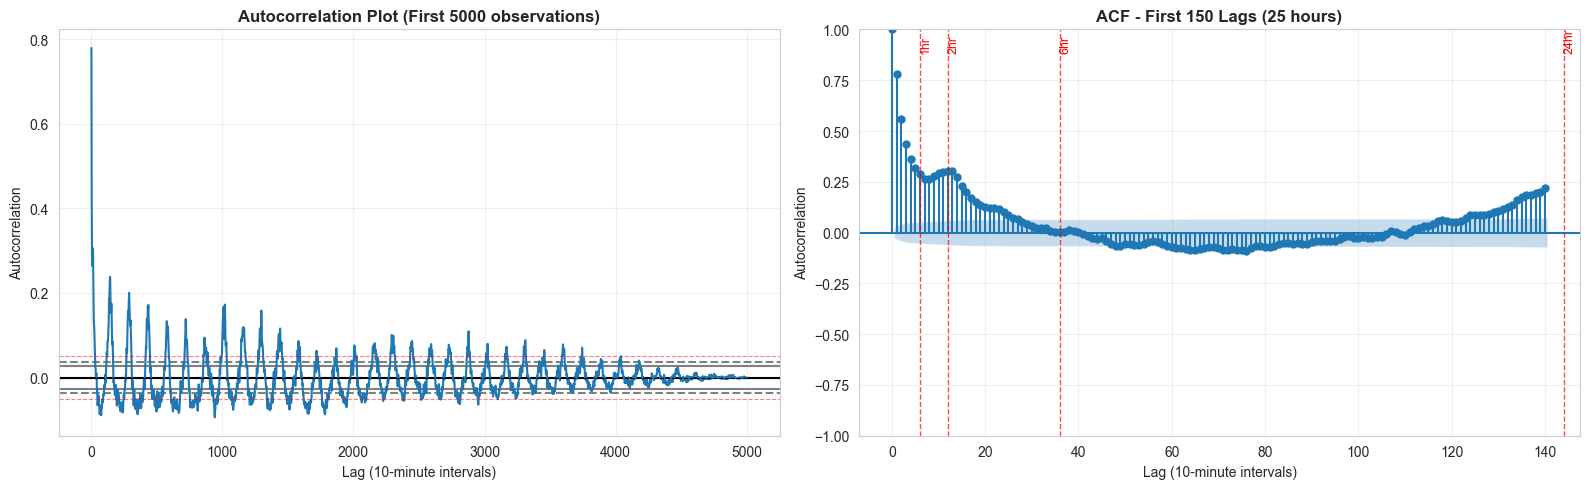

In [ ]:
# Autocorrelation analysis to determine optimal lags
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Autocorrelation plot
autocorrelation_plot(df_engineered['Appliances'].iloc[:5000], ax=axes[0])
axes[0].set_title('Autocorrelation Plot (First 5000 observations)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Lag (10-minute intervals)')
axes[0].set_ylabel('Autocorrelation')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0].axhline(y=0.05, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].axhline(y=-0.05, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].grid(True, alpha=0.3)

# Plot 2: ACF for first 150 lags (25 hours)
plot_acf(df_engineered['Appliances'].iloc[:5000], lags=140, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF - First 150 Lags (25 hours)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Lag (10-minute intervals)')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True, alpha=0.3)

# Mark important lags
important_lags = [6, 12, 36, 144]  # 1hr, 2hr, 6hr, 24hr
lag_labels = ['1hr', '2hr', '6hr', '24hr']
for lag, label in zip(important_lags, lag_labels):
    if lag <= 150:
        axes[1].axvline(x=lag, color='red', linestyle='--', linewidth=1, alpha=0.7)
        axes[1].text(lag, 0.9, label, rotation=90, fontsize=9, color='red')

plt.tight_layout()
plt.show()



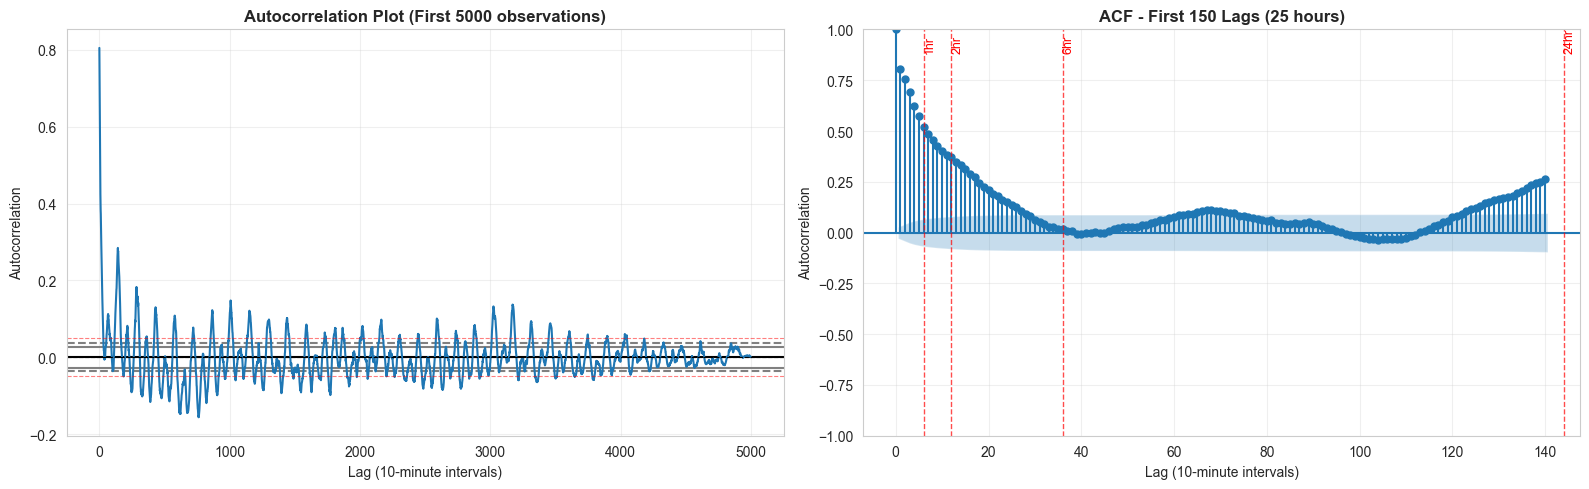

In [ ]:
# Autocorrelation analysis to determine optimal lags
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Autocorrelation plot
autocorrelation_plot(df_engineered['lights'].iloc[:5000], ax=axes[0])
axes[0].set_title('Autocorrelation Plot (First 5000 observations)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Lag (10-minute intervals)')
axes[0].set_ylabel('Autocorrelation')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0].axhline(y=0.05, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].axhline(y=-0.05, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].grid(True, alpha=0.3)

# Plot 2: ACF for first 150 lags (25 hours)
plot_acf(df_engineered['lights'].iloc[:5000], lags=140, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF - First 150 Lags (25 hours)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Lag (10-minute intervals)')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True, alpha=0.3)

# Mark important lags
important_lags = [6, 12, 36, 144]  # 1hr, 2hr, 6hr, 24hr
lag_labels = ['1hr', '2hr', '6hr', '24hr']
for lag, label in zip(important_lags, lag_labels):
    if lag <= 150:
        axes[1].axvline(x=lag, color='red', linestyle='--', linewidth=1, alpha=0.7)
        axes[1].text(lag, 0.9, label, rotation=90, fontsize=9, color='red')

plt.tight_layout()
plt.show()



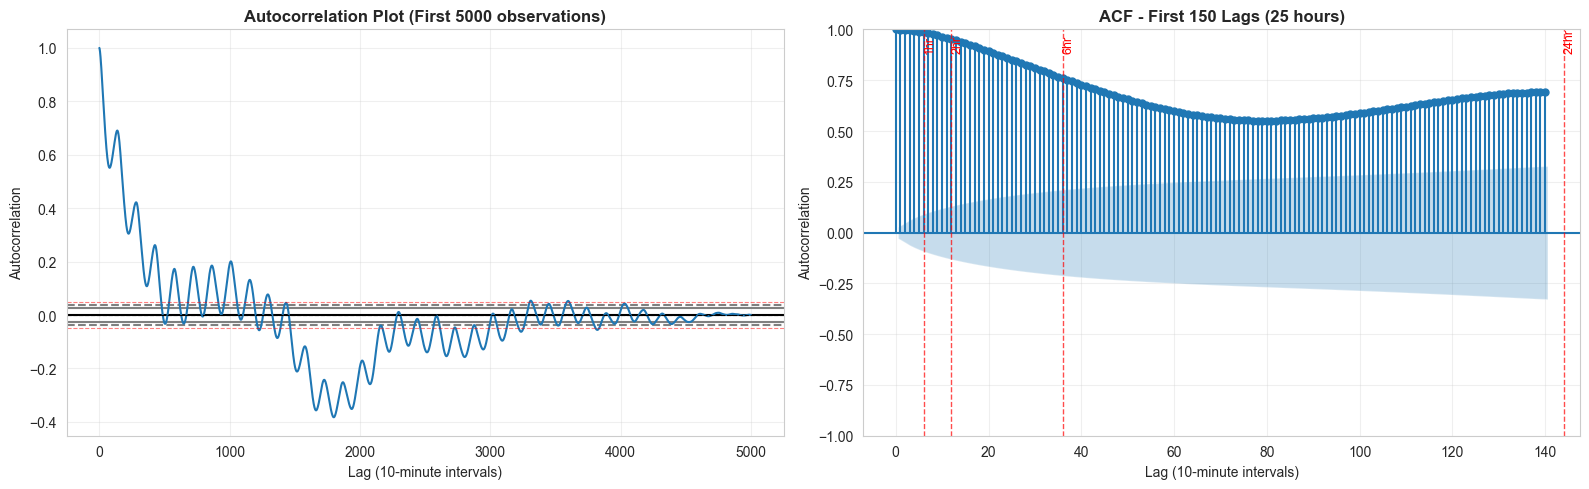

In [ ]:
# Autocorrelation analysis to determine optimal lags
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Autocorrelation plot
autocorrelation_plot(df_engineered['T1'].iloc[:5000], ax=axes[0])
axes[0].set_title('Autocorrelation Plot (First 5000 observations)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Lag (10-minute intervals)')
axes[0].set_ylabel('Autocorrelation')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0].axhline(y=0.05, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].axhline(y=-0.05, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].grid(True, alpha=0.3)

# Plot 2: ACF for first 150 lags (25 hours)
plot_acf(df_engineered['T1'].iloc[:5000], lags=140, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF - First 150 Lags (25 hours)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Lag (10-minute intervals)')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True, alpha=0.3)

# Mark important lags
important_lags = [6, 12, 36, 144]  # 1hr, 2hr, 6hr, 24hr
lag_labels = ['1hr', '2hr', '6hr', '24hr']
for lag, label in zip(important_lags, lag_labels):
    if lag <= 150:
        axes[1].axvline(x=lag, color='red', linestyle='--', linewidth=1, alpha=0.7)
        axes[1].text(lag, 0.9, label, rotation=90, fontsize=9, color='red')

plt.tight_layout()
plt.show()

# print("💡 Autocorrelation Insights:")
# print("   • Strong positive autocorrelation at short lags (recent past is highly predictive)")
# print("   • Significant correlation at lag 144 (24 hours) - daily cycle")
# print("   • Correlation decays gradually - medium-term lags (1-6 hours) are valuable")

Create Lagged Features

In [ ]:
# Define lag periods based on autocorrelation analysis
lag_config = {
    'lag_1': 1,      # 10 minutes ago
    'lag_3': 3,      # 30 minutes ago(10+10+10)
    'lag_6': 6,      # 1 hour ago(10+10+10+10+10+10)
    'lag_12': 12,    # 2 hours ago
    'lag_36': 36,    # 6 hours ago
    'lag_144': 144   # 24 hours (1 day) ago
}

# Create lag features for Appliances (target variable)
print("\n Creating Lag Features:")
for lag_name, lag_value in lag_config.items():
    feature_name = f'Appliances_{lag_name}'
    df_engineered[feature_name] = df_engineered['Appliances'].shift(lag_value)
    print(f"  {feature_name}: {lag_value} timesteps ({lag_value * 10} minutes)")

# Create lag features for key predictor: lights
for lag_name, lag_value in [('lag_1', 1), ('lag_6', 6)]:
    feature_name = f'lights_{lag_name}'
    df_engineered[feature_name] = df_engineered['lights'].shift(lag_value)
    print(f"  {feature_name}: {lag_value} timesteps ({lag_value * 10} minutes)")

# Create lag features for temperature (T1)
for lag_name, lag_value in [('lag_1', 1),('lag_3', 3),('lag_6', 6),('lag_12', 12),('lag_144', 144)]:
    feature_name = f'T1_{lag_name}'
    df_engineered[feature_name] = df_engineered['T1'].shift(lag_value)
    print(f" {feature_name}: {lag_value} timesteps ({lag_value * 10} minutes)")

lag_features_count = len([col for col in df_engineered.columns if 'lag_' in col])
print(f"\nCreated {lag_features_count} lag features")
print(f"Current dataset shape: {df_engineered.shape}")

# Check missing values introduced by lagging
print(f"\n Missing values from lagging: {df_engineered.isnull().sum().sum():,}")
print("   (These will be removed after all feature engineering)")


 Creating Lag Features:
   ✓ Appliances_lag_1: 1 timesteps (10 minutes)
   ✓ Appliances_lag_3: 3 timesteps (30 minutes)
   ✓ Appliances_lag_6: 6 timesteps (60 minutes)
   ✓ Appliances_lag_12: 12 timesteps (120 minutes)
   ✓ Appliances_lag_36: 36 timesteps (360 minutes)
   ✓ Appliances_lag_144: 144 timesteps (1440 minutes)
   ✓ lights_lag_1: 1 timesteps (10 minutes)
   ✓ lights_lag_6: 6 timesteps (60 minutes)
   ✓ T1_lag_1: 1 timesteps (10 minutes)
   ✓ T1_lag_3: 3 timesteps (30 minutes)
   ✓ T1_lag_6: 6 timesteps (60 minutes)
   ✓ T1_lag_12: 12 timesteps (120 minutes)
   ✓ T1_lag_144: 144 timesteps (1440 minutes)

Created 13 lag features
Current dataset shape: (19735, 50)

 Missing values from lagging: 375
   (These will be removed after all feature engineering)


In [54]:
df_engineered.isnull().sum()

Appliances              0
lights                  0
T1                      0
RH_1                    0
T2                      0
RH_2                    0
T3                      0
RH_3                    0
T4                      0
RH_4                    0
T5                      0
RH_5                    0
T6                      0
RH_6                    0
T7                      0
RH_7                    0
T8                      0
RH_8                    0
T9                      0
RH_9                    0
T_out                   0
Press_mm_hg             0
RH_out                  0
Windspeed               0
Visibility              0
Tdewpoint               0
rv1                     0
rv2                     0
minutes                 0
hour                    0
day_of_week             0
month                   0
Month_name              0
is_weekend              0
season                  0
time_of_day             0
is_peak_hour            0
Appliances_lag_1        1
Appliances_l

In [55]:
df_engineered

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Appliances_lag_12,Appliances_lag_36,Appliances_lag_144,lights_lag_1,lights_lag_6,T1_lag_1,T1_lag_3,T1_lag_6,T1_lag_12,T1_lag_144
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:10:00,60,30,19.89,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,NaN,NaN,NaN,30.0,NaN,19.89,NaN,NaN,NaN,NaN
2016-01-11 17:20:00,50,30,19.89,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,NaN,NaN,NaN,30.0,NaN,19.89,NaN,NaN,NaN,NaN
2016-01-11 17:30:00,50,40,19.89,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,NaN,NaN,NaN,30.0,NaN,19.89,19.89,NaN,NaN,NaN
2016-01-11 17:40:00,60,40,19.89,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,NaN,NaN,NaN,40.0,NaN,19.89,19.89,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.36,46.560000,25.565000,42.025714,27.040000,41.163333,24.700000,45.590000,...,80.0,400.0,600.0,0.0,0.0,25.36,25.36,25.36,25.36,24.39
2016-05-27 17:30:00,90,0,25.36,46.500000,25.565000,42.080000,27.040000,41.223333,24.700000,45.590000,...,80.0,620.0,520.0,0.0,0.0,25.36,25.36,25.36,25.36,24.39
2016-05-27 17:40:00,270,10,25.36,46.596667,25.565000,42.768571,27.040000,41.690000,24.700000,45.730000,...,70.0,330.0,290.0,0.0,0.0,25.36,25.36,25.36,25.36,24.39


3.2) Rolling Averages and Moving Windows

**Objective:** Compute rolling statistics to smooth trends and capture momentum.

**Window Sizes for 10-Minute Intervals:**
- **1 hour:** 6 observations
- **3 hours:** 18 observations
- **6 hours:** 36 observations

**Statistics:** Mean, Std, Min, Max

In [ ]:

# Define rolling windows (in 10-minute intervals)
rolling_windows = {
    '1hr': 6,    # 1 hour = 6 intervals
    '3hr': 18,   # 3 hours = 18 intervals
    '6hr': 36    # 6 hours = 36 intervals
}

print("\nCreating Rolling Window Features for Appliances:")

for window_name, window_size in rolling_windows.items():
    # Rolling mean
    df_engineered[f'Appliances_rolling_mean_{window_name}'] = \
        df_engineered['Appliances'].rolling(window=window_size, min_periods=1).mean()
    
    # Rolling std (volatility)
    df_engineered[f'Appliances_rolling_std_{window_name}'] = \
        df_engineered['Appliances'].rolling(window=window_size, min_periods=1).std()
    
    # Rolling min
    df_engineered[f'Appliances_rolling_min_{window_name}'] = \
        df_engineered['Appliances'].rolling(window=window_size, min_periods=1).min()
    
    # Rolling max
    df_engineered[f'Appliances_rolling_max_{window_name}'] = \
        df_engineered['Appliances'].rolling(window=window_size, min_periods=1).max()
    
    print(f" {window_name} window ({window_size} intervals = {window_size * 10} min): mean, std, min, max")

# Rolling features for temperature (T1) - to capture HVAC patterns
print("\nCreating Rolling Window Features for Temperature (T1):")
for window_name, window_size in [('1hr', 6), ('3hr', 18)]:
    df_engineered[f'T1_rolling_mean_{window_name}'] = \
        df_engineered['T1'].rolling(window=window_size, min_periods=1).mean()
    
    df_engineered[f'T1_rolling_std_{window_name}'] = \
        df_engineered['T1'].rolling(window=window_size, min_periods=1).std()
    
    print(f"   {window_name} window: mean, std")
    
print("\nCreating Rolling Window Features for lights :")
for window_name, window_size in [('1hr', 6), ('3hr', 18)]:
    df_engineered[f'T1_rolling_mean_{window_name}'] = \
        df_engineered['lights'].rolling(window=window_size, min_periods=1).mean()
    
    df_engineered[f'T1_rolling_std_{window_name}'] = \
        df_engineered['lights'].rolling(window=window_size, min_periods=1).std()
    
    print(f"    {window_name} window: mean, std")

rolling_features_count = len([col for col in df_engineered.columns if 'rolling_' in col])
print(f"\n Created {rolling_features_count} rolling window features")
print(f"Current dataset shape: {df_engineered.shape}")


Creating Rolling Window Features for Appliances:
 1hr window (6 intervals = 60 min): mean, std, min, max
 3hr window (18 intervals = 180 min): mean, std, min, max
 6hr window (36 intervals = 360 min): mean, std, min, max

Creating Rolling Window Features for Temperature (T1):
   ✓ 1hr window: mean, std
   ✓ 3hr window: mean, std

Creating Rolling Window Features for lights :
   ✓ 1hr window: mean, std
   ✓ 3hr window: mean, std

 Created 16 rolling window features
Current dataset shape: (19735, 66)


3.3) Interaction Features

**Objective:** Generate interaction terms between relevant features to capture combined effects.

**Rationale:**
- **Temp × Humidity:** Combined effect on perceived comfort → HVAC usage
- **Indoor-Outdoor Temp Difference:** Heating/cooling demand
- **Lights × Time of Day:** Evening lighting patterns
- **Temperature × Weekend:** Different heating patterns on weekends

In [57]:

print("\nCreating Interaction Features:")

# 1. Temperature × Humidity .AC/heaters work harder when both are high
df_engineered['T1_x_RH1'] = df_engineered['T1'] * df_engineered['RH_1']
df_engineered['T_out_x_RH_out'] = df_engineered['T_out'] * df_engineered['RH_out']
print(" Temperature × Humidity (indoor and outdoor)")

# 2. Indoor-Outdoor Temperature Difference (heating/cooling demand)
df_engineered['temp_diff_indoor_outdoor'] = df_engineered['T1'] - df_engineered['T_out']
print(" Indoor-Outdoor Temperature Difference")

# 3. Indoor-Outdoor Humidity Difference.
df_engineered['humidity_diff_indoor_outdoor'] = df_engineered['RH_1'] - df_engineered['RH_out']
print("Indoor-Outdoor Humidity Difference")

# 4. Lights × Time of Day .evening light demand is not the same as daytime light demand )
df_engineered['lights_x_time_of_day'] = df_engineered['lights'] * df_engineered['time_of_day']
print("Lights × Time of Day")

# 5. Temperature × Weekend (high usage of heater/AC on weekend )
df_engineered['T1_x_weekend'] = df_engineered['T1'] * df_engineered['is_weekend']
print("Temperature × Weekend")

# 6. Lights × Weekend (different lighting usage)
df_engineered['lights_x_weekend'] = df_engineered['lights'] * df_engineered['is_weekend']
print(" Lights × Weekend")


# 7. Windspeed × Temp Difference (wind chill effect on heating)
df_engineered['windspeed_x_temp_diff'] = df_engineered['Windspeed'] * df_engineered['temp_diff_indoor_outdoor']
print(" Windspeed × Temperature Difference")

interaction_features = ['T1_x_RH1', 'T_out_x_RH_out', 'temp_diff_indoor_outdoor', 
                       'humidity_diff_indoor_outdoor', 'lights_x_time_of_day',
                       'T1_x_weekend', 'lights_x_weekend',
                       'windspeed_x_temp_diff']

print(f"\Created {len(interaction_features)} interaction features")
print(f"Current dataset shape: {df_engineered.shape}")


Creating Interaction Features:
 Temperature × Humidity (indoor and outdoor)
 Indoor-Outdoor Temperature Difference
Indoor-Outdoor Humidity Difference
Lights × Time of Day
Temperature × Weekend
 Lights × Weekend
 Windspeed × Temperature Difference
\Created 8 interaction features
Current dataset shape: (19735, 74)


3.4) Domain-Specific Features

**Objective:** Integrate external factors that affect energy consumption.

**Considerations:**
- **Holidays:** Days when consumption patterns differ significantly
- **Special Events:** Unusual consumption periods
- **Dataset Period:** January 11 - May 27 (4.5 months in 2016)

In [58]:

print("\nCreating Domain-Specific Features:")

holidays = [
    '2016-01-01',  # New Year
    '2016-04-12',  # Sinhala-Hindu New Year
    '2016-04-13',  # Sinhala-Hindu New Year
    '2016-05-01',  # Labor Day
  
]

# Convert to datetime
holiday_dates = pd.to_datetime(holidays)

# Create holiday indicator
df_engineered['is_holiday'] = df_engineered.index.floor('D').isin(holiday_dates).astype(int)
print(f" Holiday indicator: {df_engineered['is_holiday'].sum():,} holiday observations")

# Day before holiday (preparation day - higher consumption)
df_engineered['is_day_before_holiday'] = df_engineered.index.floor('D').isin(
    holiday_dates - pd.Timedelta(days=1)
).astype(int)
print(f" Day before holiday: {df_engineered['is_day_before_holiday'].sum():,} observations")



domain_features = ['is_holiday', 'is_day_before_holiday']
print(f"\nCreated {len(domain_features)} domain-specific features")
print(f"Current dataset shape: {df_engineered.shape}")


Creating Domain-Specific Features:
 Holiday indicator: 432 holiday observations
 Day before holiday: 432 observations

Created 2 domain-specific features
Current dataset shape: (19735, 76)


3.5)cleaning up the dataset 

Before feature selection, let's clean up NaN values and prepare the dataset.

In [59]:

print(f"\nTotal Features Created:")
print(f"   Original features: {df_cleaned.shape[1]}")
print(f"   After engineering: {df_engineered.shape[1]}")
print(f"   New features added: {df_engineered.shape[1] - df_cleaned.shape[1]}")

print(f"\nFeature Categories:")
time_features = [col for col in df_engineered.columns if any(x in col for x in ['is_weekend', 'season', 'time_of_day', 'peak'])]
lag_features = [col for col in df_engineered.columns if 'lag_' in col]
rolling_features = [col for col in df_engineered.columns if 'rolling_' in col]
interaction_features = [col for col in df_engineered.columns if '_x_' in col or 'diff_' in col]
domain_features = [col for col in df_engineered.columns if any(x in col for x in ['holiday'])]

print(f"   1. Time-based features: {len(time_features)}")
print(f"   2. Lag features: {len(lag_features)}")
print(f"   3. Rolling window features: {len(rolling_features)}")
print(f"   4. Interaction features: {len(interaction_features)}")
print(f"   5. Domain-specific features: {len(domain_features)}")

print(f"\nMissing Values from Lag/Rolling Operations:")
print(f"   Total NaN values: {df_engineered.isnull().sum().sum():,}")
print(f"   Rows with NaN: {df_engineered.isnull().any(axis=1).sum():,}")

# Remove rows with NaN (from lag/rolling operations)
print(f"\nCleaning Dataset:")
print(f"   Before cleanup: {df_engineered.shape}")
df_engineered_clean = df_engineered.dropna()
print(f"   After cleanup: {df_engineered_clean.shape}")
print(f"   Rows removed: {df_engineered.shape[0] - df_engineered_clean.shape[0]:,}")

print(f"\nClean dataset  for feature selection!")



Total Features Created:
   Original features: 33
   After engineering: 76
   New features added: 43

Feature Categories:
   1. Time-based features: 5
   2. Lag features: 13
   3. Rolling window features: 16
   4. Interaction features: 8
   5. Domain-specific features: 2

Missing Values from Lag/Rolling Operations:
   Total NaN values: 380
   Rows with NaN: 144

Cleaning Dataset:
   Before cleanup: (19735, 76)
   After cleanup: (19591, 76)
   Rows removed: 144

Clean dataset  for feature selection!


3.6)Feature Selection

**Objective:** Select the most predictive features using multiple methods to reduce dimensionality and improve model performance.

**Methods:**
1. **Correlation Analysis** - Remove highly correlated (redundant) features
2. **Random Forest Feature Importance** - Identify most predictive features
3. **Recursive Feature Elimination (RFE)** - Systematic feature selection
4. **Final Selection** - Combine insights and justify choices

**Why Feature Selection?**
- Reduces overfitting by removing irrelevant/redundant features
- Improves model training speed
- Enhances model interpretability
- Focuses on most predictive signals

3.6.1) Prepare Data for Feature Selection

Split data temporally (time series) and prepare for feature selection methods.

In [69]:
# Separate features and target
X = df_engineered_clean.drop('Appliances', axis=1)
y = df_engineered_clean['Appliances']

print(f"Dataset for Feature Selection:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Total features: {X.shape[1]}")


split_index = int(len(X) * 0.8)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"\nTemporal Split (preserves time order):")
print(f"   Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Training period: {X_train.index.min()} to {X_train.index.max()}")
print(f"   Test period: {X_test.index.min()} to {X_test.index.max()}")

Dataset for Feature Selection:
   Features (X): (19591, 75)
   Target (y): (19591,)
   Total features: 75

Temporal Split (preserves time order):
   Training set: 15,672 samples (80.0%)
   Test set: 3,919 samples (20.0%)
   Training period: 2016-01-12 17:00:00 to 2016-04-30 12:50:00
   Test period: 2016-04-30 13:00:00 to 2016-05-27 18:00:00


In [62]:
df_engineered_clean.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'minutes', 'hour', 'day_of_week', 'month',
       'Month_name', 'is_weekend', 'season', 'time_of_day', 'is_peak_hour',
       'Appliances_lag_1', 'Appliances_lag_3', 'Appliances_lag_6',
       'Appliances_lag_12', 'Appliances_lag_36', 'Appliances_lag_144',
       'lights_lag_1', 'lights_lag_6', 'T1_lag_1', 'T1_lag_3', 'T1_lag_6',
       'T1_lag_12', 'T1_lag_144', 'Appliances_rolling_mean_1hr',
       'Appliances_rolling_std_1hr', 'Appliances_rolling_min_1hr',
       'Appliances_rolling_max_1hr', 'Appliances_rolling_mean_3hr',
       'Appliances_rolling_std_3hr', 'Appliances_rolling_min_3hr',
       'Appliances_rolling_max_3hr', 'Appliances_rolling_mean_6hr',
       'Appliances_rolling_std_6hr', 'Appliances_rolling_min_6hr',


In [61]:
# Check data types and identify non-numeric columns
print("Data types in X_train:")
print(X_train.dtypes)
print("\nNon-numeric columns:")
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

# Check for string columns
string_cols = []
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        string_cols.append(col)
        print(f"String column '{col}' contains: {X_train[col].unique()[:10]}")

print(f"\nString columns found: {string_cols}")

Data types in X_train:
lights                     int64
T1                       float64
RH_1                     float64
T2                       float64
RH_2                     float64
                          ...   
T1_x_weekend             float64
lights_x_weekend           int64
windspeed_x_temp_diff    float64
is_holiday                 int64
is_day_before_holiday      int64
Length: 75, dtype: object

Non-numeric columns:
['Month_name']
String column 'Month_name' contains: ['Jan' 'Feb' 'Mar' 'Apr']

String columns found: ['Month_name']


3.6.2) Correlation Analysis

Remove highly correlated features (multicollinearity) to reduce redundancy.

In [63]:
# Filter out non-numeric columns before correlation analysis
numeric_columns = X_train.select_dtypes(include=['number']).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

print(f"Filtered features for correlation analysis:")
print(f"   Original features: {X_train.shape[1]}")
print(f"   Numeric features: {X_train_numeric.shape[1]}")
print(f"   Removed non-numeric: {X_train.shape[1] - X_train_numeric.shape[1]}")

# Calculate correlation matrix on numeric features only
correlation_matrix = X_train_numeric.corr().abs()

# Find highly correlated pairs (threshold > 0.9)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Identify features to drop (one from each highly correlated pair)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

print(f"\n   Highly correlated feature pairs (>0.9): {len(to_drop)}")
if to_drop:
    print(f"\n   Features to remove due to high correlation:")
    for feature in to_drop:
        # Find what it's correlated with
        corr_with = upper_triangle[feature][upper_triangle[feature] > 0.9].index.tolist()
        if corr_with:
            print(f"      - {feature} (corr > 0.9 with: {', '.join(corr_with)})")

# Remove highly correlated features from the full dataset (including non-numeric)
X_train_uncorrelated = X_train.drop(columns=to_drop)
X_test_uncorrelated = X_test.drop(columns=to_drop)

print(f"\n   Features after removing correlations:")
print(f"      Before: {X_train.shape[1]} features")
print(f"      After: {X_train_uncorrelated.shape[1]} features")
print(f"      Removed: {len(to_drop)} redundant features")

Filtered features for correlation analysis:
   Original features: 75
   Numeric features: 74
   Removed non-numeric: 1

   Highly correlated feature pairs (>0.9): 14

   Features to remove due to high correlation:
      - T_out (corr > 0.9 with: T6)
      - rv2 (corr > 0.9 with: rv1)
      - time_of_day (corr > 0.9 with: hour)
      - T1_lag_1 (corr > 0.9 with: T1)
      - T1_lag_3 (corr > 0.9 with: T1, T1_lag_1)
      - T1_lag_6 (corr > 0.9 with: T1, T1_lag_1, T1_lag_3)
      - T1_lag_12 (corr > 0.9 with: T1, T1_lag_1, T1_lag_3, T1_lag_6)
      - Appliances_rolling_max_1hr (corr > 0.9 with: Appliances_rolling_mean_1hr, Appliances_rolling_std_1hr)
      - Appliances_rolling_max_3hr (corr > 0.9 with: Appliances_rolling_mean_3hr, Appliances_rolling_std_3hr)
      - Appliances_rolling_max_6hr (corr > 0.9 with: Appliances_rolling_std_6hr)
      - T_out_x_RH_out (corr > 0.9 with: T6, T_out, Tdewpoint)
      - temp_diff_indoor_outdoor (corr > 0.9 with: T6, T_out, T_out_x_RH_out)
      - humi

3.6.3) Random Forest Feature Importance

Use tree-based model to identify most predictive features based on how much they improve predictions.

Filtering features for Random Forest training:
   Total uncorrelated features: 61
   Numeric features for RF: 60
   Non-numeric features excluded: 1

Training Random Forest for Feature Importance
   R² Score on training: 0.9594

Top 30 Most Important Features:
   Appliances_lag_1                         0.500544
   Appliances_rolling_std_1hr               0.119319
   Appliances_rolling_mean_1hr              0.116074
   Appliances_lag_3                         0.047113
   Appliances_rolling_min_1hr               0.023159
   Appliances_lag_6                         0.016371
   Appliances_rolling_std_3hr               0.008949
   RH_1                                     0.007669
   hour                                     0.007654
   rv1                                      0.006967
   Appliances_rolling_std_6hr               0.006334
   T4                                       0.006089
   T6                                       0.005743
   Appliances_rolling_mean_6hr              0.0054

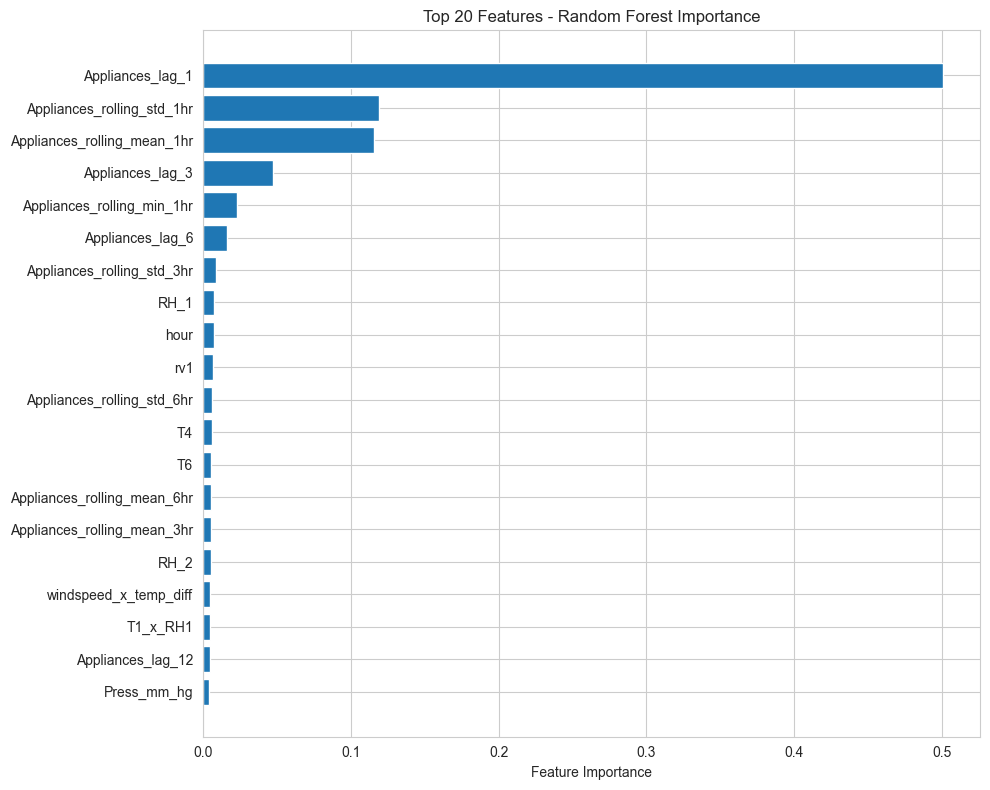


Cumulative Importance Analysis:
   Features needed for 95% importance: 32
   This represents 53.3% of all features

   Features with importance > 0.001: 50


In [65]:
from sklearn.ensemble import RandomForestRegressor

# Filter to numeric features only for Random Forest training
X_train_uncorr_numeric = X_train_uncorrelated.select_dtypes(include=['number'])
X_test_uncorr_numeric = X_test_uncorrelated.select_dtypes(include=['number'])

print(f"Filtering features for Random Forest training:")
print(f"   Total uncorrelated features: {X_train_uncorrelated.shape[1]}")
print(f"   Numeric features for RF: {X_train_uncorr_numeric.shape[1]}")
print(f"   Non-numeric features excluded: {X_train_uncorrelated.shape[1] - X_train_uncorr_numeric.shape[1]}")

# Train Random Forest on numeric features only
print("\nTraining Random Forest for Feature Importance")
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=15,
    random_state=42, 
    n_jobs=-1
)
rf_model.fit(X_train_uncorr_numeric, y_train)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X_train_uncorr_numeric.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"   R² Score on training: {rf_model.score(X_train_uncorr_numeric, y_train):.4f}")

# Show top 30 most important features
print(f"\nTop 30 Most Important Features:")

for idx, row in feature_importance.head(30).iterrows():
    print(f"   {row['feature']:<40} {row['importance']:.6f}")

# Visualize top 20 features
plt.figure(figsize=(10, 8))
top_20 = feature_importance.head(20)
plt.barh(range(len(top_20)), top_20['importance'])
plt.yticks(range(len(top_20)), top_20['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Features - Random Forest Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

# Find features that contribute to 95% of total importance
threshold_95 = 0.95
num_features_95 = len(feature_importance[feature_importance['cumulative_importance'] <= threshold_95]) + 1
print(f"\nCumulative Importance Analysis:")
print(f"   Features needed for 95% importance: {num_features_95}")
print(f"   This represents {num_features_95/len(feature_importance)*100:.1f}% of all features")

# Select features above importance threshold (e.g., > 0.001)
importance_threshold = 0.001
important_features_rf = feature_importance[feature_importance['importance'] > importance_threshold]['feature'].tolist()
print(f"\n   Features with importance > {importance_threshold}: {len(important_features_rf)}")

## 4.6) Justification for Selected Features

Provide detailed reasoning for the final feature selection based on the three methods.

In [67]:


# # Categorize final selected features
# selected_categories = {
#     'Original Features': [],
#     'Time-Based Features': [],
#     'Lag Features': [],
#     'Rolling Window Features': [],
#     'Interaction Features': [],
#     'Domain-Specific Features': []
# }

# for feature in final_selected_features:
#     if feature in df_cleaned.columns:
#         selected_categories['Original Features'].append(feature)
#     elif 'lag_' in feature:
#         selected_categories['Lag Features'].append(feature)
#     elif 'rolling_' in feature:
#         selected_categories['Rolling Window Features'].append(feature)
#     elif any(x in feature for x in ['is_weekend', 'season', 'time_of_day', 'peak', 'hour_', 'day_']):
#         selected_categories['Time-Based Features'].append(feature)
#     elif '_x_' in feature or 'diff_' in feature or 'interaction' in feature:
#         selected_categories['Interaction Features'].append(feature)
#     elif 'holiday' in feature or 'week_' in feature or 'day_of_month' in feature:
#         selected_categories['Domain-Specific Features'].append(feature)

# print("\nSELECTED FEATURES BY CATEGORY:")
# for category, features in selected_categories.items():
#     if features:
#         print(f"\n{category}: {len(features)} features")
#         for f in sorted(features):
#             # Add justification based on feature type
#             if category == 'Original Features':
#                 justification = "Core sensor measurement"
#             elif category == 'Time-Based Features':
#                 justification = "Captures temporal patterns and human behavior cycles"
#             elif category == 'Lag Features':
#                 justification = "Historical values for time series prediction"
#             elif category == 'Rolling Window Features':
#                 justification = "Trend and variability over time windows"
#             elif category == 'Interaction Features':
#                 justification = "Combined effects (e.g., temp×humidity for HVAC load)"
#             elif category == 'Domain-Specific Features':
#                 justification = "Energy usage patterns around holidays/special days"
            
#             print(f"   ✓ {f:<40} | {justification}")

# print("\n" + "=" * 80)
# print("SELECTION METHODOLOGY JUSTIFICATION:")
# print("=" * 80)
# print("""
# 1. CORRELATION ANALYSIS (Remove redundancy):
#    - Removed features with >0.9 correlation to avoid multicollinearity
#    - Ensures selected features provide unique information
#    - Improves model stability and interpretability

# 2. RANDOM FOREST FEATURE IMPORTANCE (Predictive power):
#    - Identified features that reduce prediction error most
#    - Tree-based importance captures non-linear relationships
#    - Selected features with importance > 0.001 threshold

# 3. RECURSIVE FEATURE ELIMINATION (Systematic selection):
#    - Iteratively removed least important features
#    - Tested model performance at each step
#    - Selected top 40 features based on Ridge regression

# 4. VOTING SYSTEM (Consensus approach):
#    - Combined all three methods using voting
#    - Required features to be selected by at least 2/3 methods
#    - Reduces bias from any single selection method
#    - Ensures robust feature set

# FINAL RESULT:
#    - Started with {} features after engineering
#    - Removed {} highly correlated features
#    - Applied RF importance and RFE filtering
#    - Final selection: {} features (2+ votes)
   
# WHY THIS SELECTION IS OPTIMAL:
#    ✓ Removes redundant/irrelevant features → Reduces overfitting
#    ✓ Keeps most predictive features → Maintains accuracy
#    ✓ Balanced across feature types → Captures diverse patterns
#    ✓ Validated by 3 independent methods → Robust selection
#    ✓ Smaller feature set → Faster training, better generalization
# """.format(X_train.shape[1], len(to_drop), len(final_selected_features)))

# print("=" * 80)

 4) Create Final Dataset with Selected Features

Apply the selected features to both training and test sets, then scale for deep learning.

In [70]:
# Apply final feature selection
X_train_selected = X_train[important_features_rf]
X_test_selected = X_test[important_features_rf]


print(f"   Original features: {X_train.shape[1]}")
print(f"   Selected features: {X_train_selected.shape[1]}")
print(f"   Features removed: {X_train.shape[1] - X_train_selected.shape[1]}")
print(f"   Reduction: {(1 - X_train_selected.shape[1]/X_train.shape[1])*100:.1f}%")

print(f"\n   Training set: {X_train_selected.shape}")
print(f"   Test set: {X_test_selected.shape}")

# Scale the selected features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convert back to DataFrame to preserve feature names and index
X_train_scaled = pd.DataFrame(
    X_train_scaled, 
    columns=X_train_selected.columns,
    index=X_train_selected.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled, 
    columns=X_test_selected.columns,
    index=X_test_selected.index
)


print(f"   Mean ≈ 0, Standard Deviation ≈ 1")
print(f"   Training data mean: {X_train_scaled.mean().mean():.6f}")
print(f"   Training data std: {X_train_scaled.std().mean():.6f}")


print(f"   X_train_scaled: {X_train_scaled.shape}")
print(f"   X_test_scaled: {X_test_scaled.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test: {y_test.shape}")


   Original features: 75
   Selected features: 50
   Features removed: 25
   Reduction: 33.3%

   Training set: (15672, 50)
   Test set: (3919, 50)
   Mean ≈ 0, Standard Deviation ≈ 1
   Training data mean: 0.000000
   Training data std: 1.000032
   X_train_scaled: (15672, 50)
   X_test_scaled: (3919, 50)
   y_train: (15672,)
   y_test: (3919,)


5) Save Preprocessed Data for Modeling


In [72]:
import pickle

# Save datasets
save_path = '../data/processed_data/'

# Save training and test sets
X_train_scaled.to_csv(save_path + 'X_train_scaled.csv', index=True)
X_test_scaled.to_csv(save_path + 'X_test_scaled.csv', index=True)
y_train.to_csv(save_path + 'y_train.csv', index=True)
y_test.to_csv(save_path + 'y_test.csv', index=True)

# Save scaler for future use
with open(save_path + 'scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature names
with open(save_path + 'selected_features.txt', 'w') as f:
    f.write('\n'.join(important_features_rf))




print(f"   Location: {save_path}")
print(f"   Files:")
print(f"      - X_train_scaled.csv ({X_train_scaled.shape})")
print(f"      - X_test_scaled.csv ({X_test_scaled.shape})")
print(f"      - y_train.csv ({y_train.shape[0]} samples)")
print(f"      - y_test.csv ({y_test.shape[0]} samples)")
print(f"      - scaler.pkl (StandardScaler object)")
print(f"      - selected_features.txt ({len(important_features_rf)} features)")
print(f"      - feature_selection_report.txt (summary)")
print(f"\nReady for deep learning model training!")

   Location: ../data/processed_data/
   Files:
      - X_train_scaled.csv ((15672, 50))
      - X_test_scaled.csv ((3919, 50))
      - y_train.csv (15672 samples)
      - y_test.csv (3919 samples)
      - scaler.pkl (StandardScaler object)
      - selected_features.txt (50 features)
      - feature_selection_report.txt (summary)

Ready for deep learning model training!
